In [1]:
# Load dependencies and mat.-files
from src import RelErrorTracker
import scipy.sparse.linalg as spla
import scipy.sparse as sp
import numpy as np
import scipy.io
import time
from matplotlib import pyplot as plt
import ilupp
mat = scipy.io.loadmat('../data/cooling_flange.mat')
A = mat["A"]
b = np.random.rand(A.shape[0])

### Display sparsity

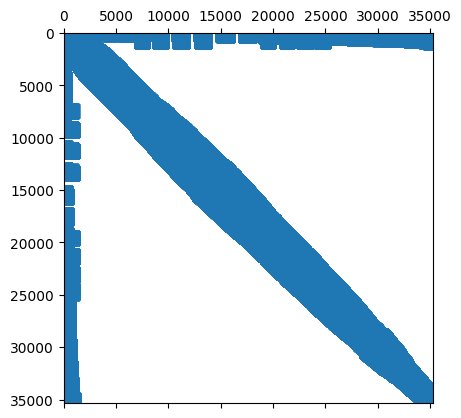

In [2]:
plt.spy(A)

### Linear (sparse) Solver:

In [3]:
t = time.time()
x_ls = spla.spsolve(A,b)
dt = time.time() - t
print(f"Computation time linear solver: {dt} seconds. Relative error: {np.linalg.norm(A*x_ls-b)/np.linalg.norm(b)}")

Computation time linear solver: 8.180371046066284 seconds. Relative error: 3.651321530333483e-12


### Regular Conjugate Gradient:

In [4]:
relerror = 1e-4

relerr_cg = RelErrorTracker(A,b)
t = time.time()
x_cg = spla.cg(A, b, tol = relerror, callback = relerr_cg.callback)[0]
dt = time.time() - t
print(f"Computation time conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_cg-b)/np.linalg.norm(b)}")

Computation time conjugate gradient: 4.225646018981934 seconds. Relative error: 9.827845398427052e-05


### PCG (M: diag)

In [5]:
relerr_pcgd = RelErrorTracker(A,b)

M = sp.diags(A.diagonal()**(-1))
t = time.time()
x_pcgd = spla.cg(A, b, tol = relerror, M = M, callback=relerr_pcgd.callback)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcgd-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 3.460271120071411 seconds. Relative error: 9.875319316843556e-05


### PCG (M: ichol)

In [6]:
relerr_pcgc = RelErrorTracker(A,b)

M = ilupp.IChol0Preconditioner(sp.csr_matrix(A))
t = time.time()
x_pcgc = spla.cg(A, b, tol = relerror, M = M, callback=relerr_pcgc.callback)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcgc-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 1.2051482200622559 seconds. Relative error: 9.089731974197851e-05


### Compare plots

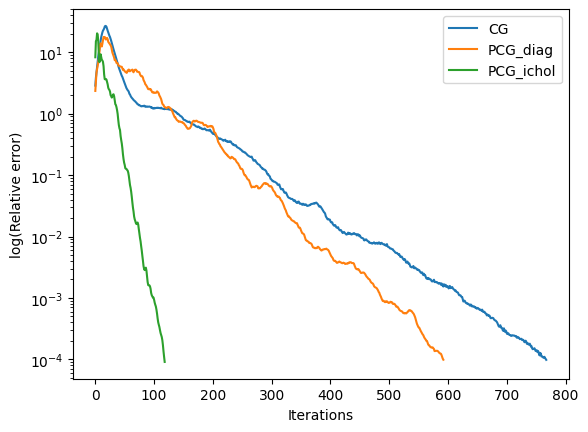

In [7]:
plt.semilogy(relerr_cg.norms)
plt.semilogy(relerr_pcgd.norms)
plt.semilogy(relerr_pcgc.norms)
plt.xlabel("Iterations")
plt.ylabel("log(Relative error)")
plt.legend(["CG","PCG_diag","PCG_ichol"])
plt.show()

### Part c

In [76]:
# Load mat.-files and display sparsity
mat = scipy.io.loadmat('../data/convdiff.mat')
A = mat["A"]
np.random.seed(4)
b = np.random.rand(A.shape[0])


### Display sparsity

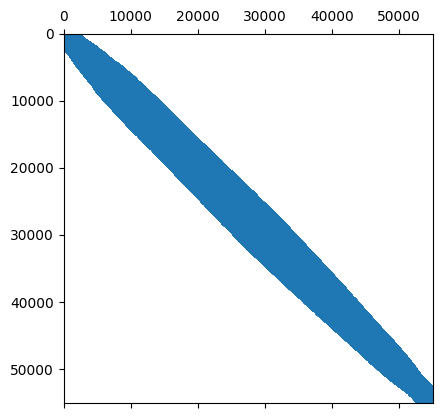

In [55]:
plt.spy(A)

### Linear (sparse) solver

In [19]:
# Linear solver:
t = time.time()
x = spla.spsolve(A,b)
dt = time.time() - t
print(f"Computation time linear solver: {dt} seconds. Relative error: {np.linalg.norm(A*x-b)/np.linalg.norm(b)}")

Computation time linear solver: 34.324100732803345 seconds. Relative error: 6.065027530090178e-12


Construct preconditioner ilu:

In [77]:
M = ilupp.ILUTPreconditioner(sp.csr_matrix(A))

In [80]:
relerror = 1e-4
relerr_gm = RelErrorTracker(A,b)
t = time.time()
x_gm = spla.gmres(A, b, tol = relerror, M=M, callback=relerr_gm.callback, callback_type='x', maxiter=3000)[0]
dt = time.time() - t
print(f"Computation time preconditioned gmres: {dt} seconds. Relative error: {np.linalg.norm(A*x_gm-b)/np.linalg.norm(b)}")

Computation time preconditioned gmres: 2.385788917541504 seconds. Relative error: 2.9839484297043237e-05


#### GMRES without preconditioner:

In [81]:
relerr_gm_without = RelErrorTracker(A,b)

t = time.time()
x_gm_without = spla.gmres(A, b, tol = relerror, callback=relerr_gm_without.callback, callback_type = "x", maxiter=3000)[0]
dt = time.time() - t
print(f"Computation time gmres: {dt} seconds. Relative error: {np.linalg.norm(A*x_gm_without-b)/np.linalg.norm(b)}")

Computation time gmres: 7.085031270980835 seconds. Relative error: 9.949291983726468e-05


## Compare plots GMRES

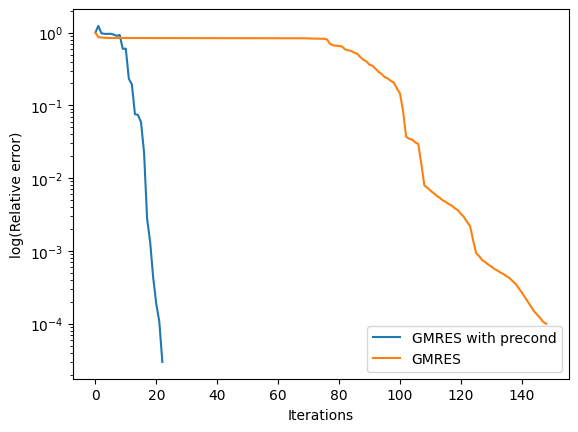

In [82]:
plt.semilogy(relerr_gm.norms)
plt.semilogy(relerr_gm_without.norms)
plt.xlabel("Iterations")
plt.ylabel("log(Relative error)")
plt.legend(["GMRES with precond","GMRES"])
plt.show()

### Using the package "ilupp"

In [84]:
t = time.time()
x_ilupp, info = ilupp.solve(sp.csr_matrix(A),b, info = True, rtol = relerror)
dt = time.time() - t
print(f"Computation time using ilupp: {dt} seconds. Relative error: {np.linalg.norm(A*x_ilupp-b)/np.linalg.norm(b)}")
print(f"ILUPP converged at {info[0]} iterations")

Computation time using ilupp: 0.9461932182312012 seconds. Relative error: 5.970692454008197e-07
ILUPP converged at 117 iterations
